In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk
import importlib

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [27]:
lc = lk.search_lightcurvefile(kic, quarter=1).download().PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc = lc.append(lk.search_lightcurvefile(kic, quarter=q).download().PDCSAP_FLUX.normalize().flatten(window_length=401))
lc = lc.remove_outliers(4)
pg = lc.to_periodogram(normalization='psd', minimum_frequency=150.0).flatten()

In [28]:
star = pb.jar.star(kic, pg.frequency.value, pg.power.value, 
                   numax, dnu, teff, bp_rp, 
                   store_chains=True, 
                   nthreads=4)

In [29]:
star.run_epsilon()

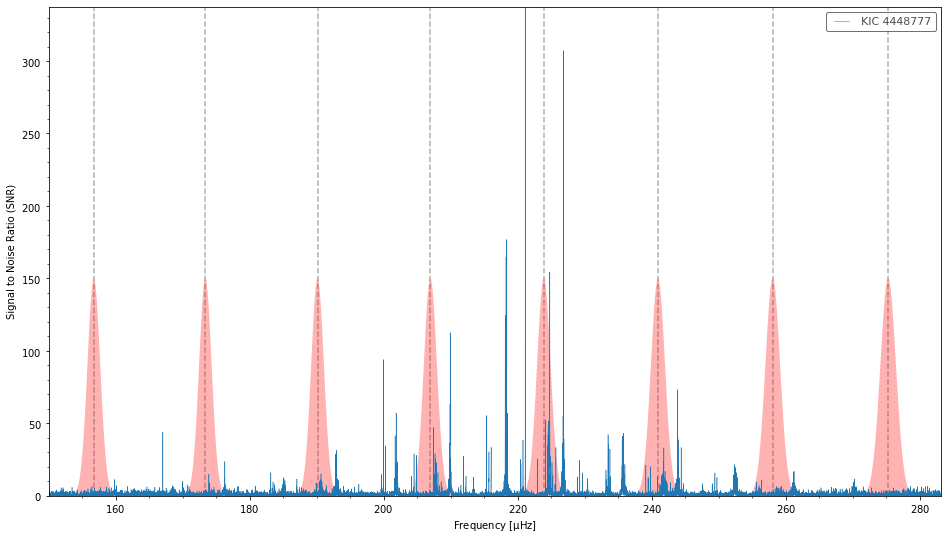

In [30]:
star.epsilon.plot(pg, h=150)

In [31]:
star.run_asy_peakbag()

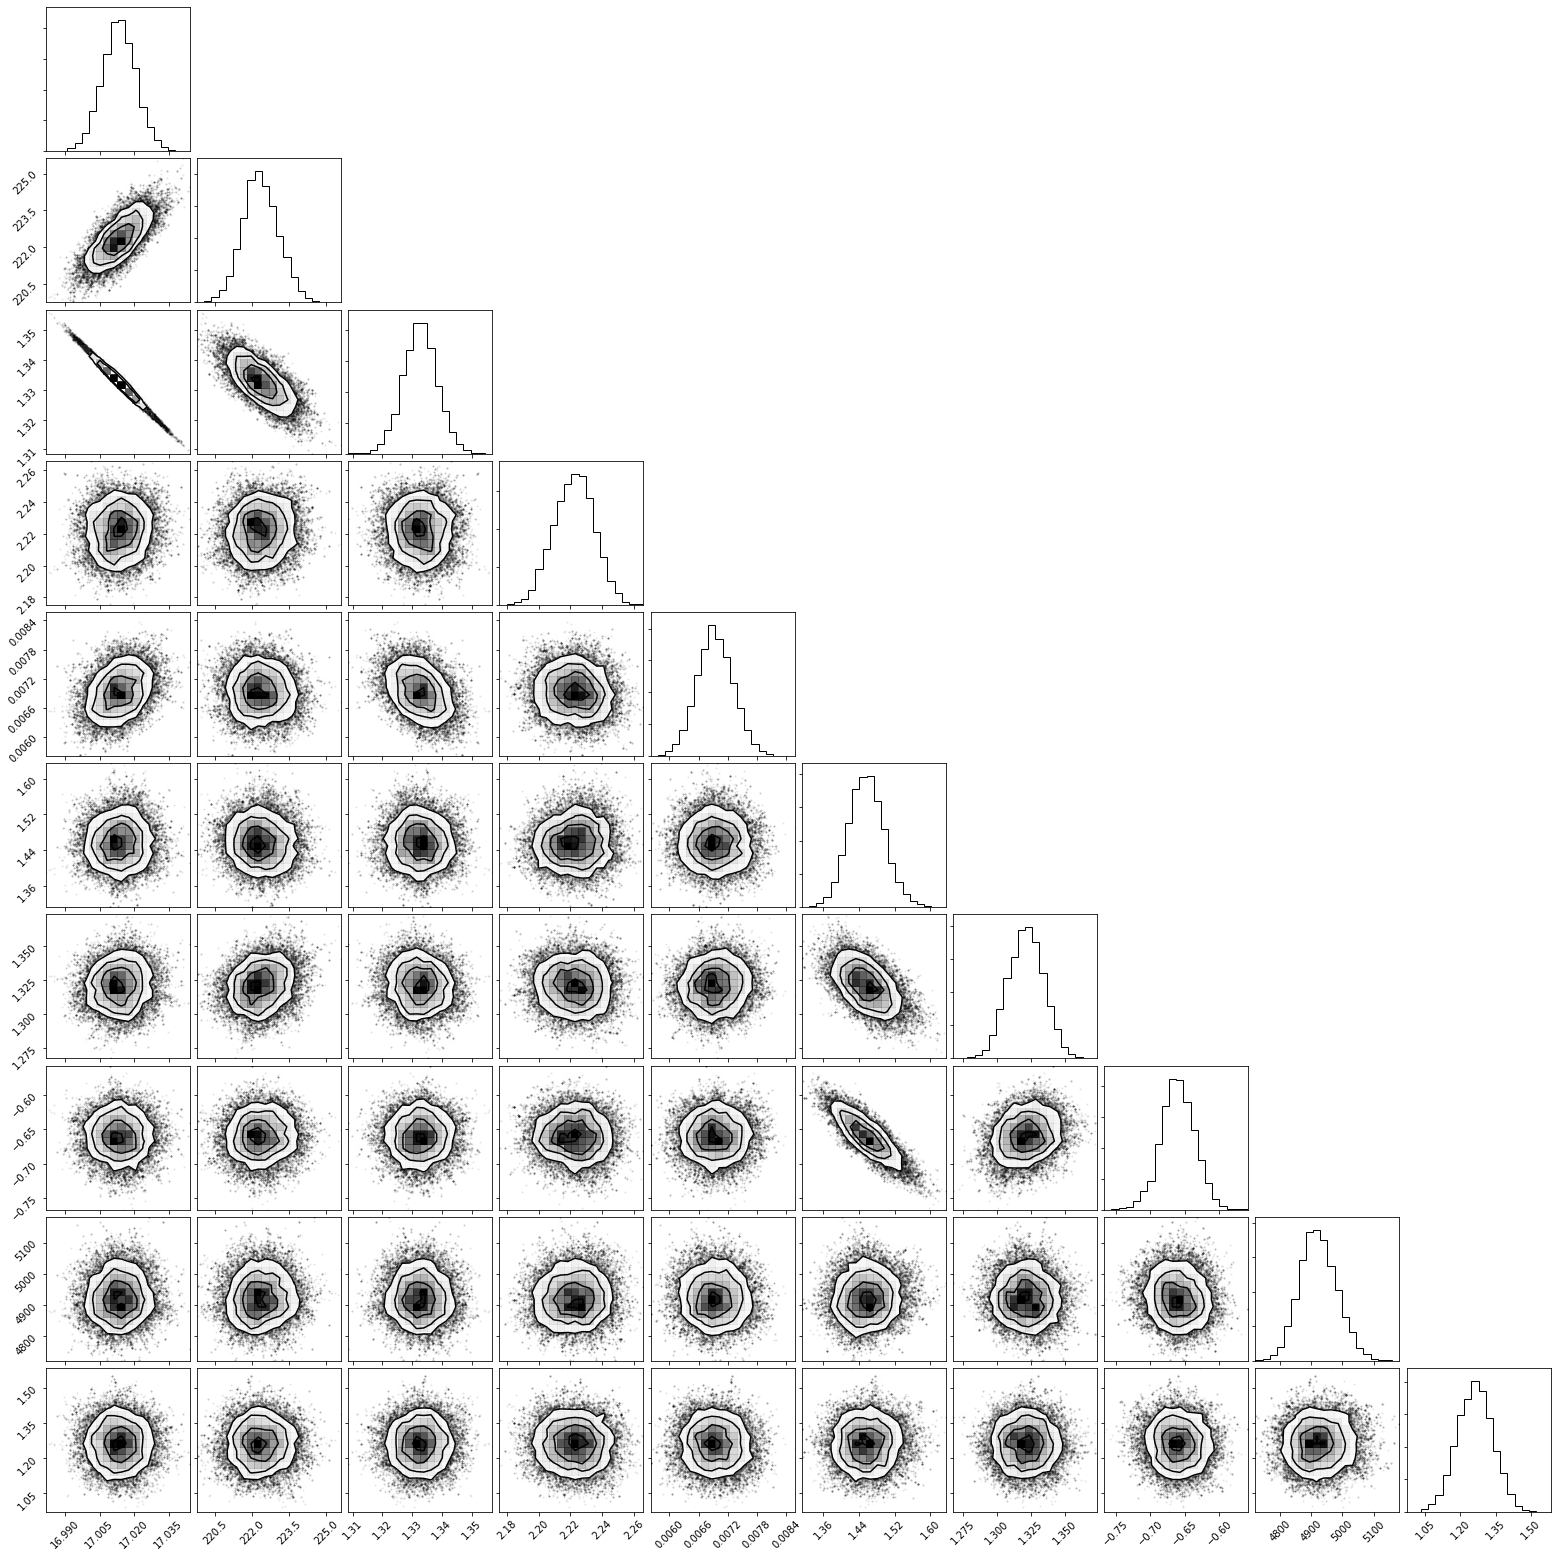

In [32]:
import corner
corner.corner(star.asy_fit.flatchain);

In [33]:
import pbjam
star.peakbag = pbjam.peakbag.peakbag(star.f, star.s, star.asy_result)
#plt.plot(star.peakbag.ladder_f, star.peakbag.ladder_p)
print(star.peakbag.start)
print(star.peakbag.asy_result['summary'].loc['mean'].dnu)
print(star.peakbag.asy_result['summary'].loc['mean'].eps)
star.peakbag.plot_start_model()

{'l0': array([143.09027581, 159.60441834, 176.23626808, 192.98583697,
       209.85337767, 226.83914596, 243.94282089, 261.16380458]), 'l2': array([140.86764168, 157.38175985, 174.01368442, 190.76354713,
       207.63136609, 224.61708407, 241.72104267, 258.9425895 ]), 'width0': array([0.21878478, 0.21878478, 0.21878478, 0.21878478, 0.21878478,
       0.21878478, 0.21878478, 0.21878478]), 'width2': array([0.21878478, 0.21878478, 0.21878478, 0.21878478, 0.21878478,
       0.21878478, 0.21878478, 0.21878478]), 'height0': array([2.24128064e-02, 3.23789410e-01, 2.54482803e+00, 1.07368007e+01,
       2.39918824e+01, 2.80105052e+01, 1.68535995e+01, 5.15487869e+00]), 'height2': array([1.56889645e-02, 2.26652587e-01, 1.78137962e+00, 7.51576050e+00,
       1.67943177e+01, 1.96073536e+01, 1.17975196e+01, 3.60841508e+00]), 'back': array([1., 1., 1., 1., 1., 1., 1., 1.])}
17.013519507691573
1.332627243232763


ValueError: operands could not be broadcast together with shapes (2096,6) (8,) 

In [ ]:
star.peakbag.plot_start_model()

In [ ]:
star.run_peakbag()